In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    low = m-h
    high = m+h
    return round(m,3), round(low[0],3), round(high[0],3)

# Q1

In [8]:
Q1_filter = pd.DataFrame(columns=[2 ** np.arange(9)])
Q1_filter_norm = pd.DataFrame(columns=[2 ** np.arange(9)])
Q1_data = pd.DataFrame(columns=[2 ** np.arange(9)])
Q1_data_norm = pd.DataFrame(columns=[2 ** np.arange(9)])

for i in range (10):
    file1 = open(f"exp/1.{i}.out", 'r')
    Lines = file1.readlines()
    
    data_ = []
    data_norm = []
    filter_ = []
    filter_norm = []
    
    index = 0
    for line in Lines:
        tokens = line.rstrip().split(' ')
        if tokens[0] == 'Collecting':
            index = int(tokens[-1])
        elif tokens[0] == 'Serial':
            second = float(tokens[-2])
            if tokens[1] == 'data':
                data_.append(second)
                data_norm.append(second/index)
            else:
                filter_.append(second)
                filter_norm.append(second/index)
    Q1_data.loc[i] = data_
    Q1_data_norm.loc[i] = data_norm
    Q1_filter.loc[i] = filter_
    Q1_filter_norm.loc[i] = filter_norm

<Figure size 432x288 with 0 Axes>

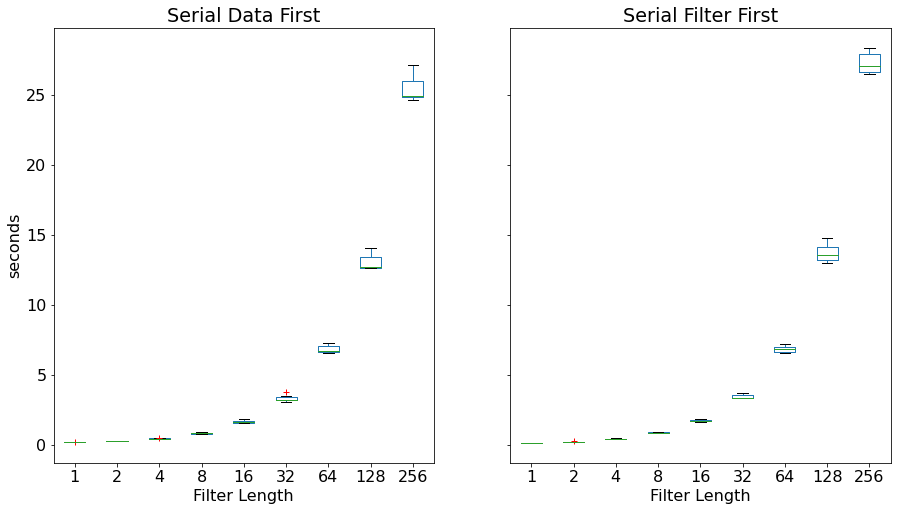

In [9]:
plt.figure()
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(15,8)

Q1_data.plot.box(sym="r+", ax=axes[0]);
Q1_filter.plot.box(sym="r+", ax=axes[1]);
axes[0].set_xticklabels(2 ** np.arange(9))
axes[0].set_ylabel('seconds')
axes[0].set_xlabel('Filter Length')
axes[0].set_title('Serial Data First')
axes[1].set_xticklabels(2 ** np.arange(9))
axes[1].set_ylabel('seconds')
axes[1].set_xlabel('Filter Length')
axes[1].set_title('Serial Filter First')

fig.savefig('plot/Q1.png')

<Figure size 432x288 with 0 Axes>

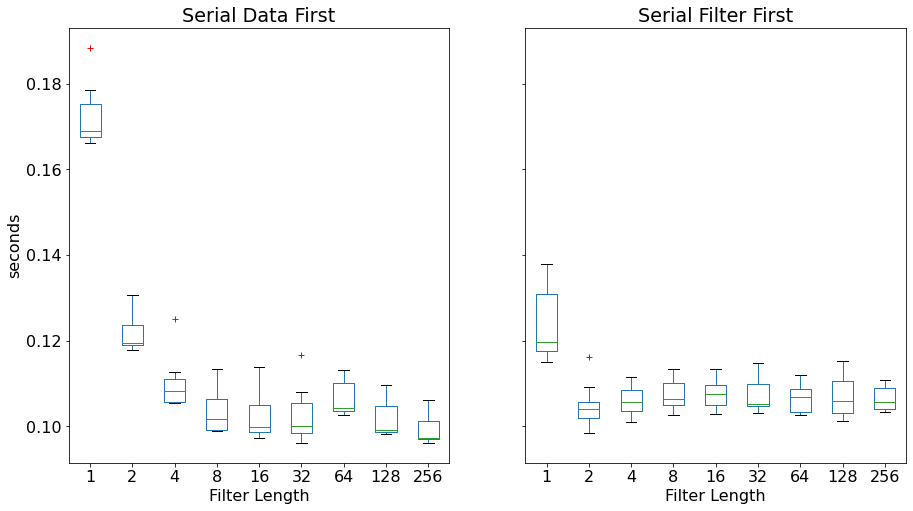

In [10]:
plt.figure()
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(15,8)

Q1_data_norm.plot.box(sym="r+", ax=axes[0]);
Q1_filter_norm.plot.box(sym="r+", ax=axes[1]);
axes[0].set_xticklabels(2 ** np.arange(9))
axes[0].set_ylabel('seconds')
axes[0].set_xlabel('Filter Length')
axes[0].set_title('Serial Data First')
axes[1].set_xticklabels(2 ** np.arange(9))
axes[1].set_ylabel('seconds')
axes[1].set_xlabel('Filter Length')
axes[1].set_title('Serial Filter First')

fig.savefig('plot/Q1_norm.png')

In [47]:
Q1_data_norm

,1,2,4,8,16,32,64,128,256
0,0.167237,0.118803,0.105683,0.101682,0.100629,0.098694,0.104442,0.099068,0.096530
1,0.176456,0.125064,0.111020,0.103774,0.106461,0.106337,0.111300,0.106585,0.106049
2,0.178506,0.125056,0.112619,0.107137,0.109605,0.108127,0.112442,0.107675,0.102463
3,0.188362,0.130547,0.124979,0.113498,0.113919,0.116646,0.113045,0.109627,0.102535
4,0.171401,0.119737,0.105367,0.099114,0.099537,0.098510,0.103260,0.099120,0.097421
5,0.168721,0.118912,0.111058,0.101730,0.100359,0.099410,0.104113,0.099583,0.098063
6,0.168536,0.119443,0.110422,0.108459,0.098875,0.102448,0.106243,0.098634,0.097315
7,0.169278,0.117855,0.106061,0.099124,0.098555,0.100679,0.103422,0.098768,0.096942
8,0.166065,0.118947,0.105829,0.098952,0.097404,0.096145,0.102762,0.098711,0.097007
9,0.167071,0.119287,0.105439,0.099461,0.098302,0.097135,0.104204,0.098339,0.096118


In [46]:
Q1_filter_norm

,1,2,4,8,16,32,64,128,256
0,0.119305,0.101976,0.109043,0.109863,0.109846,0.104166,0.106602,0.106480,0.105897
1,0.133715,0.116193,0.110325,0.110276,0.109494,0.111334,0.112022,0.111888,0.110772
2,0.122288,0.109140,0.105631,0.110127,0.113350,0.111475,0.109008,0.115298,0.109662
3,0.136592,0.105031,0.106952,0.113400,0.110880,0.114862,0.111778,0.113287,0.110268
4,0.120181,0.105841,0.103628,0.107111,0.105607,0.105172,0.106913,0.105172,0.103695
5,0.137807,0.104670,0.103595,0.105520,0.102894,0.104657,0.102730,0.102456,0.104255
6,0.114942,0.100868,0.105832,0.104886,0.107679,0.103074,0.102555,0.101300,0.103846
7,0.117614,0.103250,0.101101,0.102664,0.103711,0.105093,0.102914,0.102689,0.103316
8,0.116782,0.098536,0.102076,0.104830,0.107609,0.105208,0.104871,0.104321,0.107189
9,0.117568,0.101959,0.111425,0.105404,0.104722,0.105798,0.107737,0.106656,0.105368


# Q2

In [48]:
Q2_filter = pd.DataFrame(columns=[2 ** np.arange(5)])
Q2_filter_norm = pd.DataFrame(columns=[2 ** np.arange(5)])
Q2_data = pd.DataFrame(columns=[2 ** np.arange(5)])
Q2_data_norm = pd.DataFrame(columns=[2 ** np.arange(5)])

for i in range (10):
    file1 = open(f"exp/2.{i}.out", 'r')
    Lines = file1.readlines()
    
    data_ = []
    data_norm = []
    filter_ = []
    filter_norm = []
    
    index = 0
    for line in Lines:
        tokens = line.rstrip().split(' ')
        if tokens[0] == 'Collecting':
            index = int(tokens[-1])
        elif tokens[0] == 'Parallel':
            second = float(tokens[-2])
            if tokens[1] == 'data':
                data_.append(second)
                data_norm.append(second/index)
            else:
                filter_.append(second)
                filter_norm.append(second/index)
    Q2_data.loc[i] = data_
    Q2_data_norm.loc[i] = data_norm
    Q2_filter.loc[i] = filter_
    Q2_filter_norm.loc[i] = filter_norm

In [49]:
Q2_filter

,1,2,4,8,16
0,13.895190,7.078242,3.818944,2.444691,2.188282
1,13.809499,7.117998,3.880320,2.490728,2.281300
2,14.544332,7.488073,3.829077,2.489379,2.185416
3,14.592810,7.498719,3.978473,2.492593,2.189605
4,14.263470,7.349026,3.870333,2.483696,2.203502
5,14.307197,7.334762,3.830118,2.467863,2.188379
6,14.020198,7.276353,3.910237,2.485107,2.210009
7,14.317899,7.206035,3.885789,2.458448,2.200210
8,13.704101,7.115753,3.929964,2.514637,2.244897
9,13.727715,7.100411,3.811340,2.522003,2.313873


<Figure size 432x288 with 0 Axes>

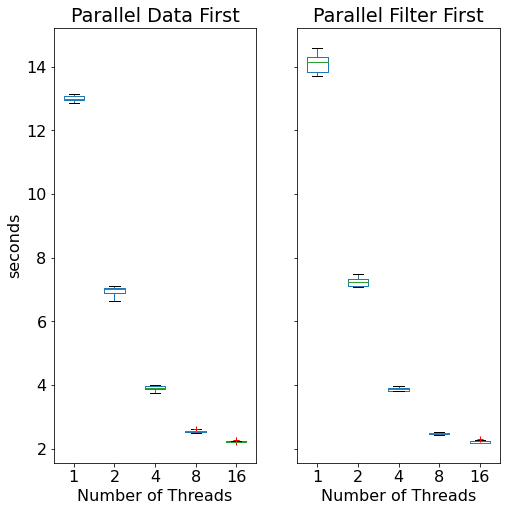

In [34]:
plt.figure()
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8,8)

Q2_data.plot.box(sym="r+", ax=axes[0]);
Q2_filter.plot.box(sym="r+", ax=axes[1]);
axes[0].set_xticklabels(2 ** np.arange(5))
axes[0].set_ylabel('seconds')
axes[0].set_xlabel('Number of Threads')
axes[0].set_title('Parallel Data First')
axes[1].set_xticklabels(2 ** np.arange(5))
axes[1].set_ylabel('seconds')
axes[1].set_xlabel('Number of Threads')
axes[1].set_title('Parallel Filter First')

fig.savefig('plot/Q2.png')

<Figure size 432x288 with 0 Axes>

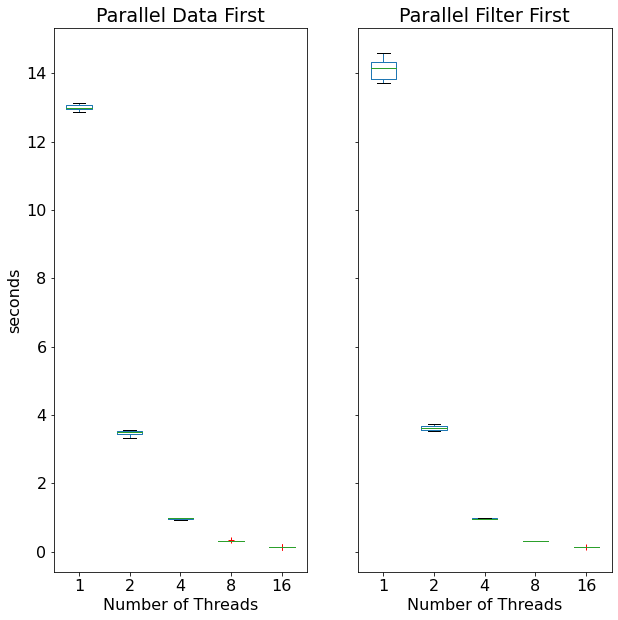

In [56]:
plt.figure()
plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(10,10)

Q2_data_norm.plot.box(sym="r+", ax=axes[0]);
Q2_filter_norm.plot.box(sym="r+", ax=axes[1]);
axes[0].set_xticklabels(2 ** np.arange(5))
axes[0].set_ylabel('seconds')
axes[0].set_xlabel('Number of Threads')
axes[0].set_title('Parallel Data First')
axes[1].set_xticklabels(2 ** np.arange(5))
axes[1].set_ylabel('seconds')
axes[1].set_xlabel('Number of Threads')
axes[1].set_title('Parallel Filter First')

fig.savefig('plot/Q2_norm.png')

In [59]:
Q2_data

,1,2,4,8,16
0,12.879286,6.657590,3.745410,2.505501,2.227098
1,12.978087,6.883561,3.922345,2.573716,2.236162
2,13.137835,6.877372,3.965089,2.640745,2.237230
3,12.993184,7.047683,3.997847,2.554642,2.204014
4,13.077014,7.115916,3.867979,2.521251,2.295344
5,13.025275,7.044475,3.921685,2.576138,2.231089
6,12.941715,6.842424,3.959337,2.529599,2.228849
7,12.870681,7.047438,3.862694,2.545287,2.215713
8,12.957778,7.026188,3.979842,2.569459,2.222973
9,13.081902,7.022134,3.899968,2.628706,2.281367


In [75]:
# Q2_data_avg.loc[nThread, 0].item()
Q2_data_avg.loc[1, 0]

1    12.994276
Name: 0, dtype: float64

In [80]:
Q2_data_avg = pd.DataFrame(Q2_data.mean())
Q2_data_avg
before_imp = Q2_data_avg.loc[1, 0].item()
for nThread in np.array(2 ** np.arange(5)):
    Q2_data_avg.loc[nThread, 0] = before_imp / Q2_data_avg.loc[nThread, 0].item()
Q2_data_avg

# we measure perforamnce as a function of processors. 
processors = np.array(2 ** np.arange(5))
speedup = np.array(Q2_data_avg[0])
print(processors)
print(speedup)
amdahl_number = processors/(processors-1)*(1-1/speedup)
amdahl_number

[ 1  2  4  8 16]
[1.         1.86793885 3.32145867 5.06697345 5.80624181]


<ipython-input-80-658aad8062aa>:13: RuntimeWarning: divide by zero encountered in true_divide
  amdahl_number = processors/(processors-1)*(1-1/speedup)
<ipython-input-80-658aad8062aa>:13: RuntimeWarning: invalid value encountered in multiply
  amdahl_number = processors/(processors-1)*(1-1/speedup)


array([       nan, 0.92930114, 0.93190328, 0.91730689, 0.88295633])

In [81]:
Q2_filter_avg = pd.DataFrame(Q2_filter.mean())
Q2_filter_avg
before_imp = Q2_filter_avg.loc[1, 0].item()
for nThread in np.array(2 ** np.arange(5)):
    Q2_filter_avg.loc[nThread, 0] = before_imp / Q2_filter_avg.loc[nThread, 0].item()
Q2_filter_avg

# we measure perforamnce as a function of processors. 
processors = np.array(2 ** np.arange(5))
speedup = np.array(Q2_filter_avg[0])
print(processors)
print(speedup)
amdahl_number = processors/(processors-1)*(1-1/speedup)
amdahl_number

[ 1  2  4  8 16]
[1.         1.9455893  3.64392533 5.68158023 6.35800062]


<ipython-input-81-ea318178ac7b>:13: RuntimeWarning: divide by zero encountered in true_divide
  amdahl_number = processors/(processors-1)*(1-1/speedup)
<ipython-input-81-ea318178ac7b>:13: RuntimeWarning: invalid value encountered in multiply
  amdahl_number = processors/(processors-1)*(1-1/speedup)


array([       nan, 0.97203382, 0.96742755, 0.94170586, 0.89889904])

# Q3

In [36]:
Q3 = pd.DataFrame(columns=['DFUF', 'FFUF', 'DFUD', 'FFUD'])

for i in range (10):
    file1 = open(f"exp/3.{i}.out", 'r')
    Lines = file1.readlines()
    
    data_ = []
    data_norm = []
    filter_ = []
    filter_norm = []
    
    index = 0
    for line in Lines:
        tokens = line.rstrip().split(' ')
        if tokens[0] == 'Collecting':
            index = int(tokens[-1])
        elif tokens[0] != 'Data':
            second = float(tokens[-2])
            Q3.loc[i, tokens[0]] = second

Q3

,DFUF,FFUF,DFUD,FFUD
0,4.190547,5.478097,5.444859,4.071322
1,4.124660,5.703293,5.703319,4.090340
2,4.135633,5.504437,5.478515,4.097181
3,4.161904,5.497743,5.488226,4.096655
4,4.093613,5.524743,5.482034,4.087423
5,4.144348,5.493276,5.433087,4.110019
6,4.142378,5.662992,5.521749,4.073057
7,4.146688,5.689596,5.756130,4.206633
8,4.136145,5.567240,5.715773,4.093413
9,4.166215,5.650624,5.709438,4.206072


<Figure size 432x288 with 0 Axes>

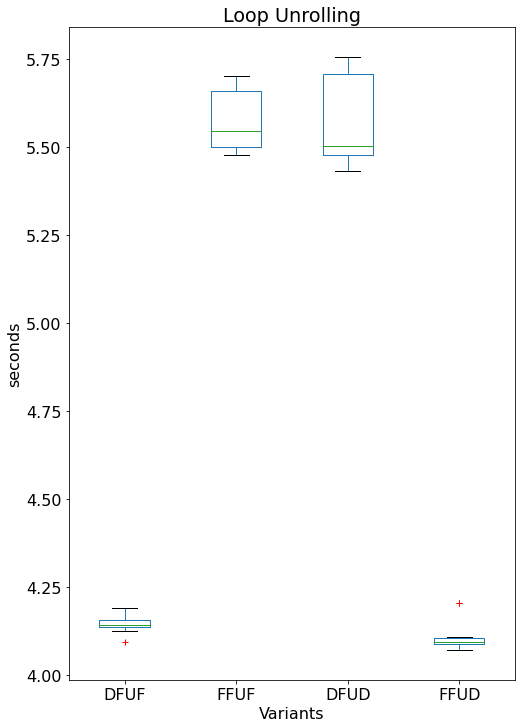

In [42]:
plt.figure()
plt.rcParams.update({'font.size': 16})

ax = Q3.plot.box(sym="r+")
ax.set_ylabel('seconds')
ax.set_xlabel('Variants')
ax.set_title('Loop Unrolling')
fig = ax.get_figure()
fig.set_size_inches(8,12)
fig.savefig('plot/Q3.png')